In [35]:
import pandas as pd
from keras.layers import Activation, SimpleRNN
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2
import keras
from sklearn.model_selection import train_test_split

In [9]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1075081421093098883
xla_global_id: -1
]


2023-11-18 17:42:38.505163: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-18 17:42:38.510920: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [36]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [37]:
dataset_general =  pd.read_csv('/home/lpazc/Documentos/Proyects/DroidMalDetect-Py/results/dataframe_to_scaled.csv', index_col=False)

In [38]:
dataset_general

,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,category
0,0.000044,0.000000,0.000003,0.000000e+00,0.002072,0.000000,0.005511,0.006356,0.000000,0.000000,...,0.891079,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0
1,0.000000,0.000010,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.891079,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0
2,0.000044,0.000000,0.000003,0.000000e+00,0.002072,0.000000,0.005511,0.006356,0.000000,0.000000,...,0.891079,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0
3,0.000044,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.891079,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0
4,0.000044,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.891079,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587689,0.000044,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.891079,0.0000,0.0,0.0000,0.0000,0.063207,0.0,0.063207,0.063207,0
2587690,0.000000,0.000010,0.000002,6.449532e-07,0.001677,0.023288,0.008923,0.000000,0.007443,0.066438,...,0.891079,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0
2587691,0.000000,0.000010,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.891079,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0
2587692,0.000000,0.000010,0.000002,9.375094e-07,0.001677,0.023288,0.008923,0.000000,0.010820,0.096575,...,0.891079,0.0000,0.0,0.0000,0.0000,0.000000,0.0,0.000000,0.000000,0


In [39]:
categories = dataset_general.category
dataset_values =  dataset_general.drop(['category'], axis=1)

In [7]:
categories

0          0
1          0
2          0
3          0
4          0
          ..
2587689    0
2587690    0
2587691    0
2587692    0
2587693    0
Name: category, Length: 2587694, dtype: int64

In [40]:
train_dataset, test_dataset, train_category, test_category =  train_test_split(dataset_values, categories, random_state=42, test_size=1/7)

In [31]:
train_category

2287265    0
198962     0
1196928    1
2316188    0
146299     0
          ..
110268     0
1692743    0
2356330    0
2229084    0
2219110    0
Name: category, Length: 2218023, dtype: int64

In [42]:
train_category

2287265    0
198962     0
1196928    1
2316188    0
146299     0
          ..
110268     0
1692743    0
2356330    0
2229084    0
2219110    0
Name: category, Length: 2218023, dtype: int64

In [45]:
train_dataset.shape

(2218023, 64)

In [46]:
def inputTrain():
    return train_dataset

def outputTrain():
    return train_category

def inputTest():
    return test_dataset

def outputTest():
    return test_category


In [67]:
histories =  None
def Network():
    modelo = Sequential()
    #agregar capas
    #model.add(SimpleRNN(1, 100))
    modelo.add(Dense(6, input_shape=(64,), kernel_regularizer= l2(0.), activation='relu')) # tanh, sigmoid, relu, tan, normal
    modelo.add(Dense(10, kernel_regularizer= l2(0.), activation='relu'))
    modelo.add(Dense(10, kernel_regularizer= l2(0.), activation='relu'))
    #modelo.add(Dense(5, kernel_regularizer= l2(0.),activation='relu'))
    #modelo.add(Dense(256, kernel_initializer='normal',activation='relu'))
    #modelo.add(Dense(256, kernel_initializer='normal',activation='relu'))
    modelo.add(Dense(1,  kernel_regularizer= l2(0.), activation='linear'))
    
    #modelo.add(Dense(1,  kernel_initializer= 'normal', activation='linear')) # sigmoid sogmax-> para sacar probabilidades en todos los resultados a= 90%, b=30%, c=60%
    modelo.compile(loss='mean_absolute_error', 
                   optimizer = 'sgd', 
                   metrics=[["accuracy"]])
    histories = modelo.fit(inputTrain(),outputTrain(), epochs=50)
    modelo.evaluate(inputTest(),outputTest())
    return modelo, histories

In [68]:
model, history = Network()

Epoch 1/50
69314/69314 [==============================] - 46s 665us/step - loss: 0.4623 - accuracy: 0.5391
Epoch 2/50
69314/69314 [==============================] - 46s 661us/step - loss: 0.4527 - accuracy: 0.5516
Epoch 3/50
69314/69314 [==============================] - 46s 659us/step - loss: 0.4507 - accuracy: 0.5530
Epoch 4/50
 1611/69314 [..............................] - ETA: 42s - loss: 0.4483 - accuracy: 0.5558

KeyboardInterrupt: 

In [63]:
print(history.history)

{'loss': [0.4585580825805664, 0.45436179637908936, 0.45347926020622253, 0.4529663920402527, 0.45261964201927185], 'accuracy': [0.5439091324806213, 0.54804527759552, 0.5483392477035522, 0.5483617782592773, 0.5485082864761353]}


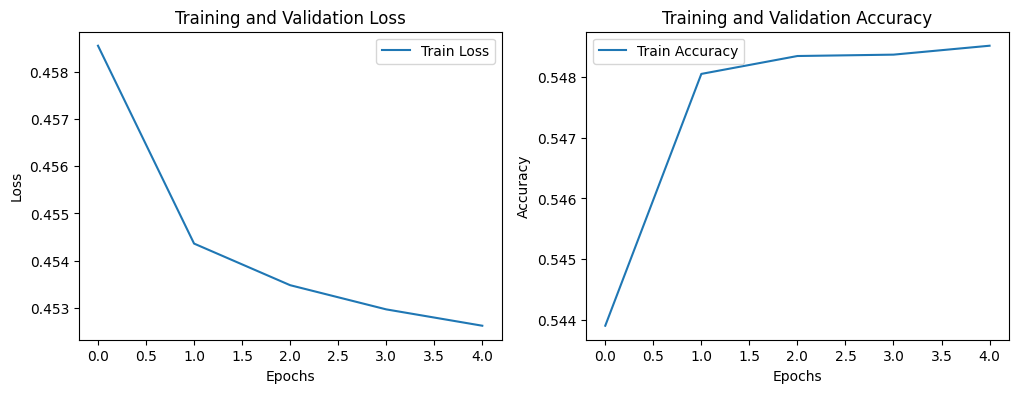

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

# Graficar pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss') 
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy') 
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show() 

In [57]:
history